# Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# Read data

In [3]:
df = pd.read_csv('final.csv')
df

,DateTime,RMSSD,User Name,Air Qualityall Good,Beverage,Cloth 1,Cloth 2,Cloth 3,Cloth 4,Cloth 5,...,Location_LD124,Location_LD125,Location_LD323,Location_LD328,Humidity,Temperature,TemperatureF,Light,eCO2,TVOC
0,2022-12-12 13:28:19,30.287191,1,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.5,21.4,70.52,1106.0,530.0,19.0
1,2022-12-12 13:28:43,103.473443,0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.5,21.4,70.52,1106.0,530.0,19.0
2,2022-12-12 13:31:19,25.434576,1,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.5,21.4,70.52,992.0,584.0,28.0
3,2022-12-12 13:34:52,26.282239,1,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.6,21.4,70.52,1118.0,589.0,28.0
4,2022-12-12 13:39:23,31.830500,1,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.7,21.5,70.70,1115.0,2018.0,779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2022-12-21 14:35:33,50.970070,0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,46.2,21.4,70.52,34.0,403.0,0.0
409,2022-12-21 14:36:59,87.268340,1,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,46.3,21.3,70.34,26.0,409.0,1.0
410,2022-12-21 14:44:34,67.847083,1,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,46.5,21.3,70.34,26.0,402.0,0.0
411,2022-12-21 14:45:46,50.554896,0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,46.5,21.3,70.34,24.0,409.0,1.0


<AxesSubplot:>

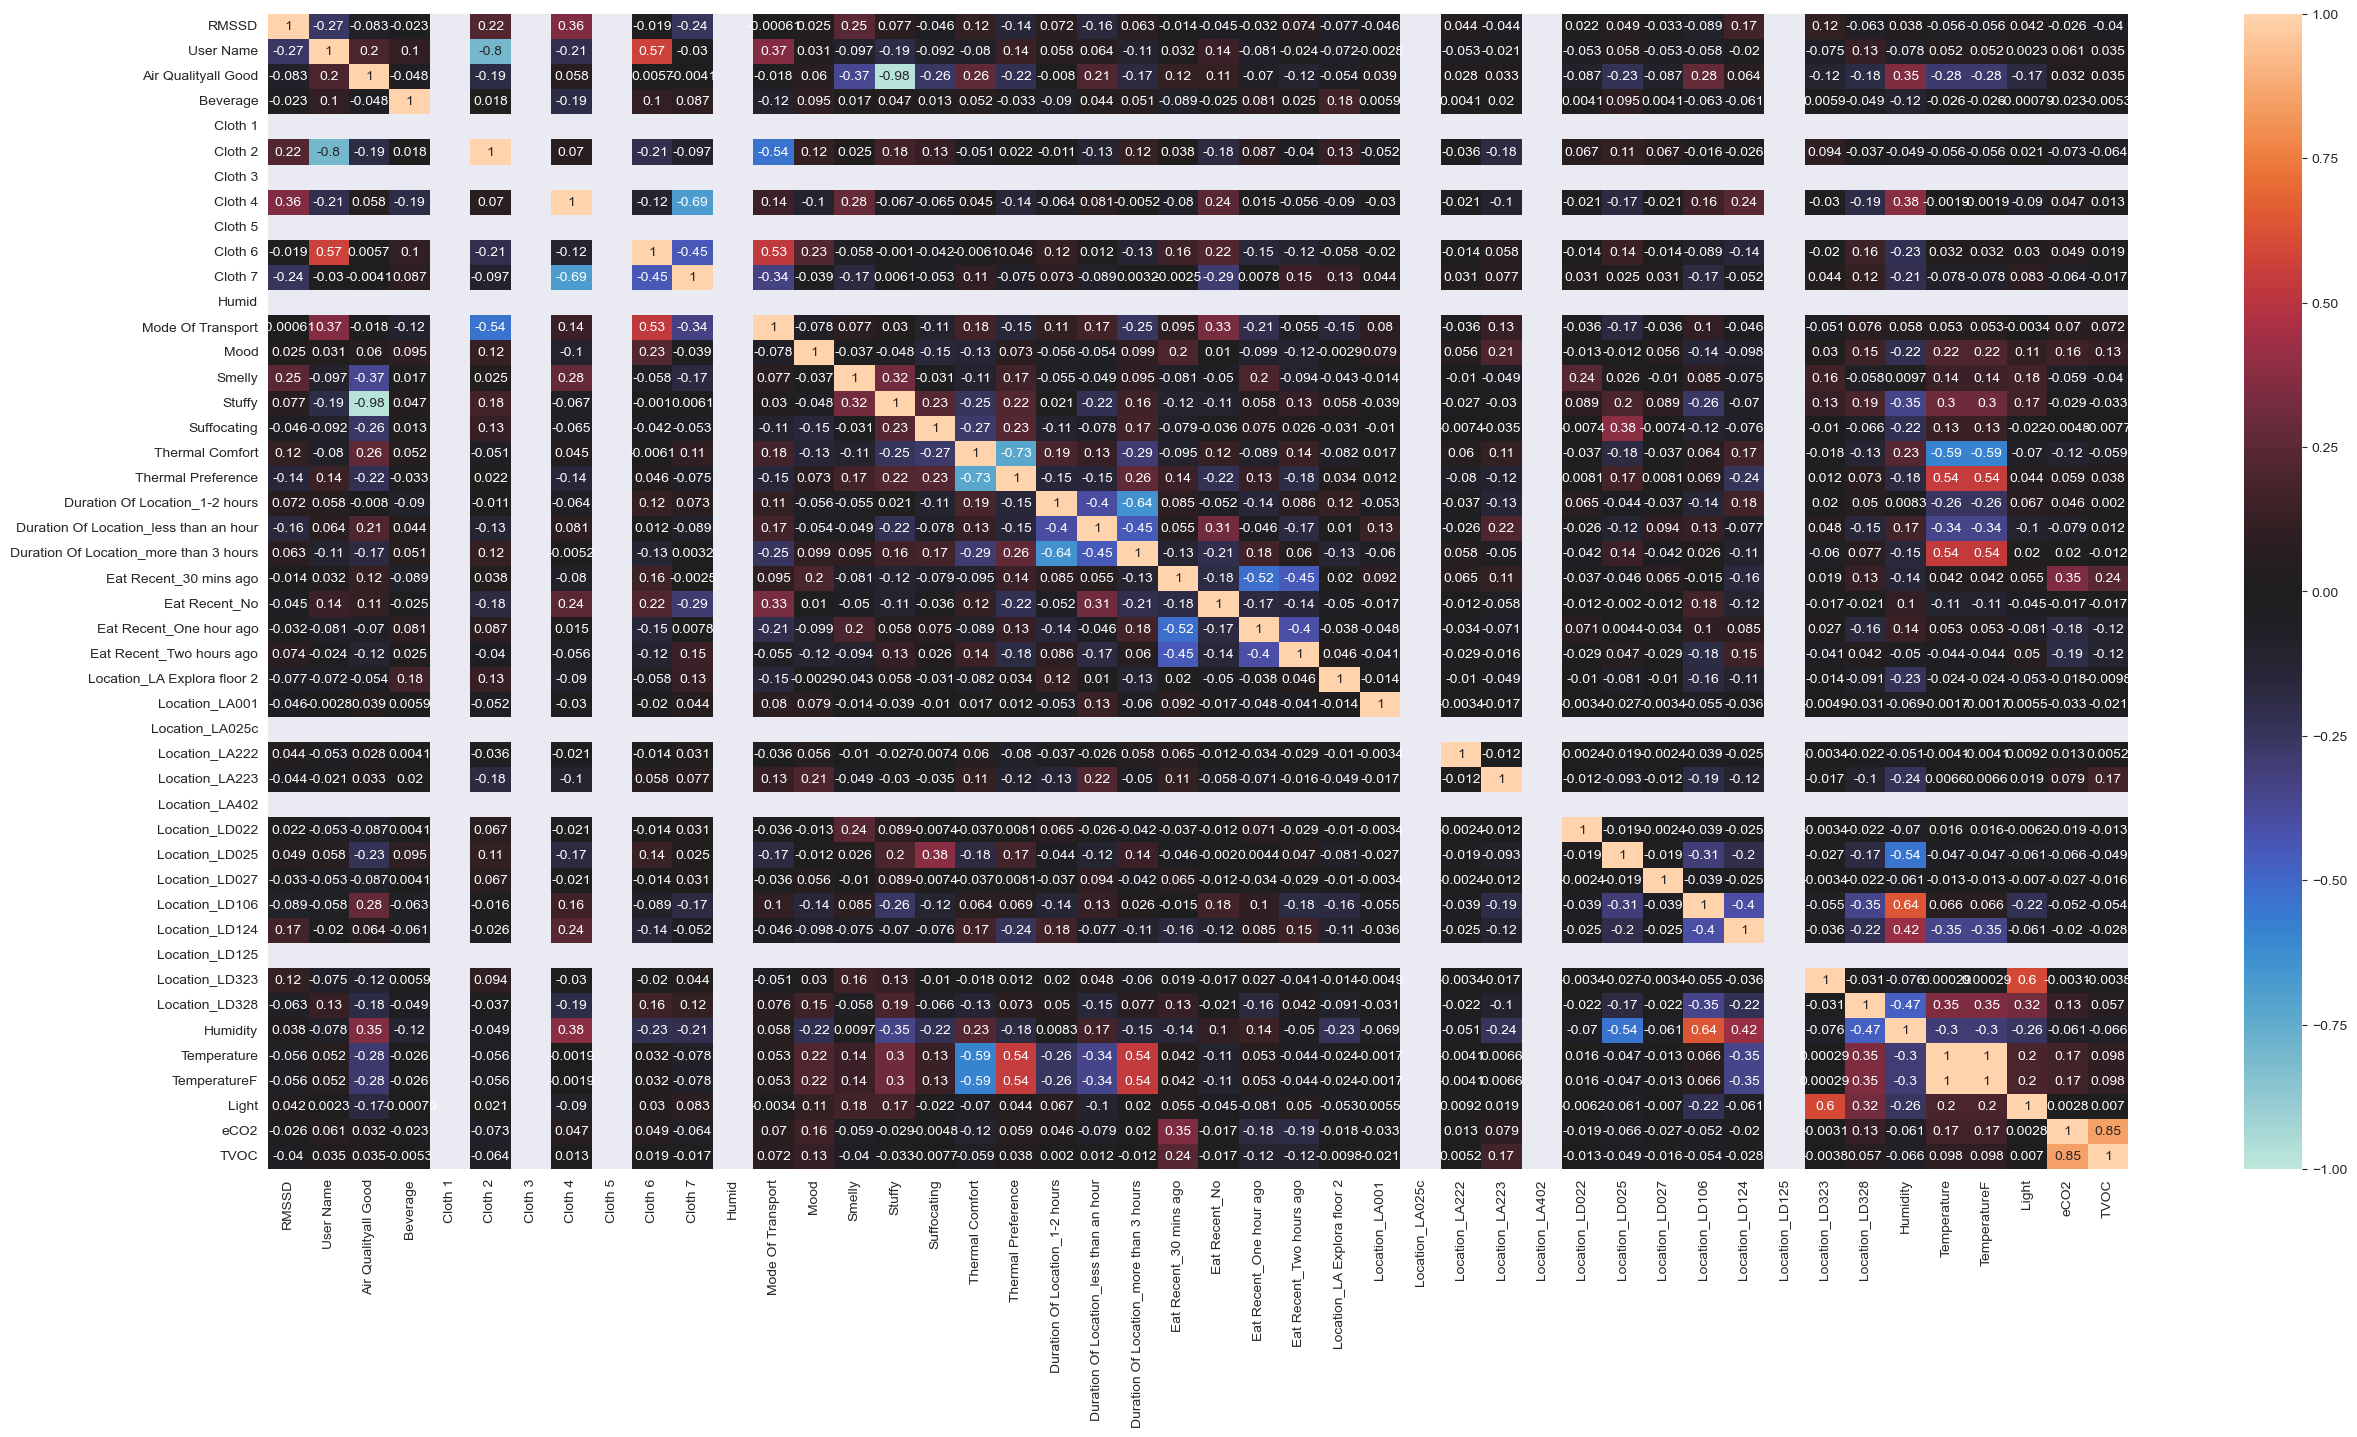

In [4]:
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(method="pearson"), annot=True, vmin=-1, vmax=1, center=0)

<AxesSubplot:>

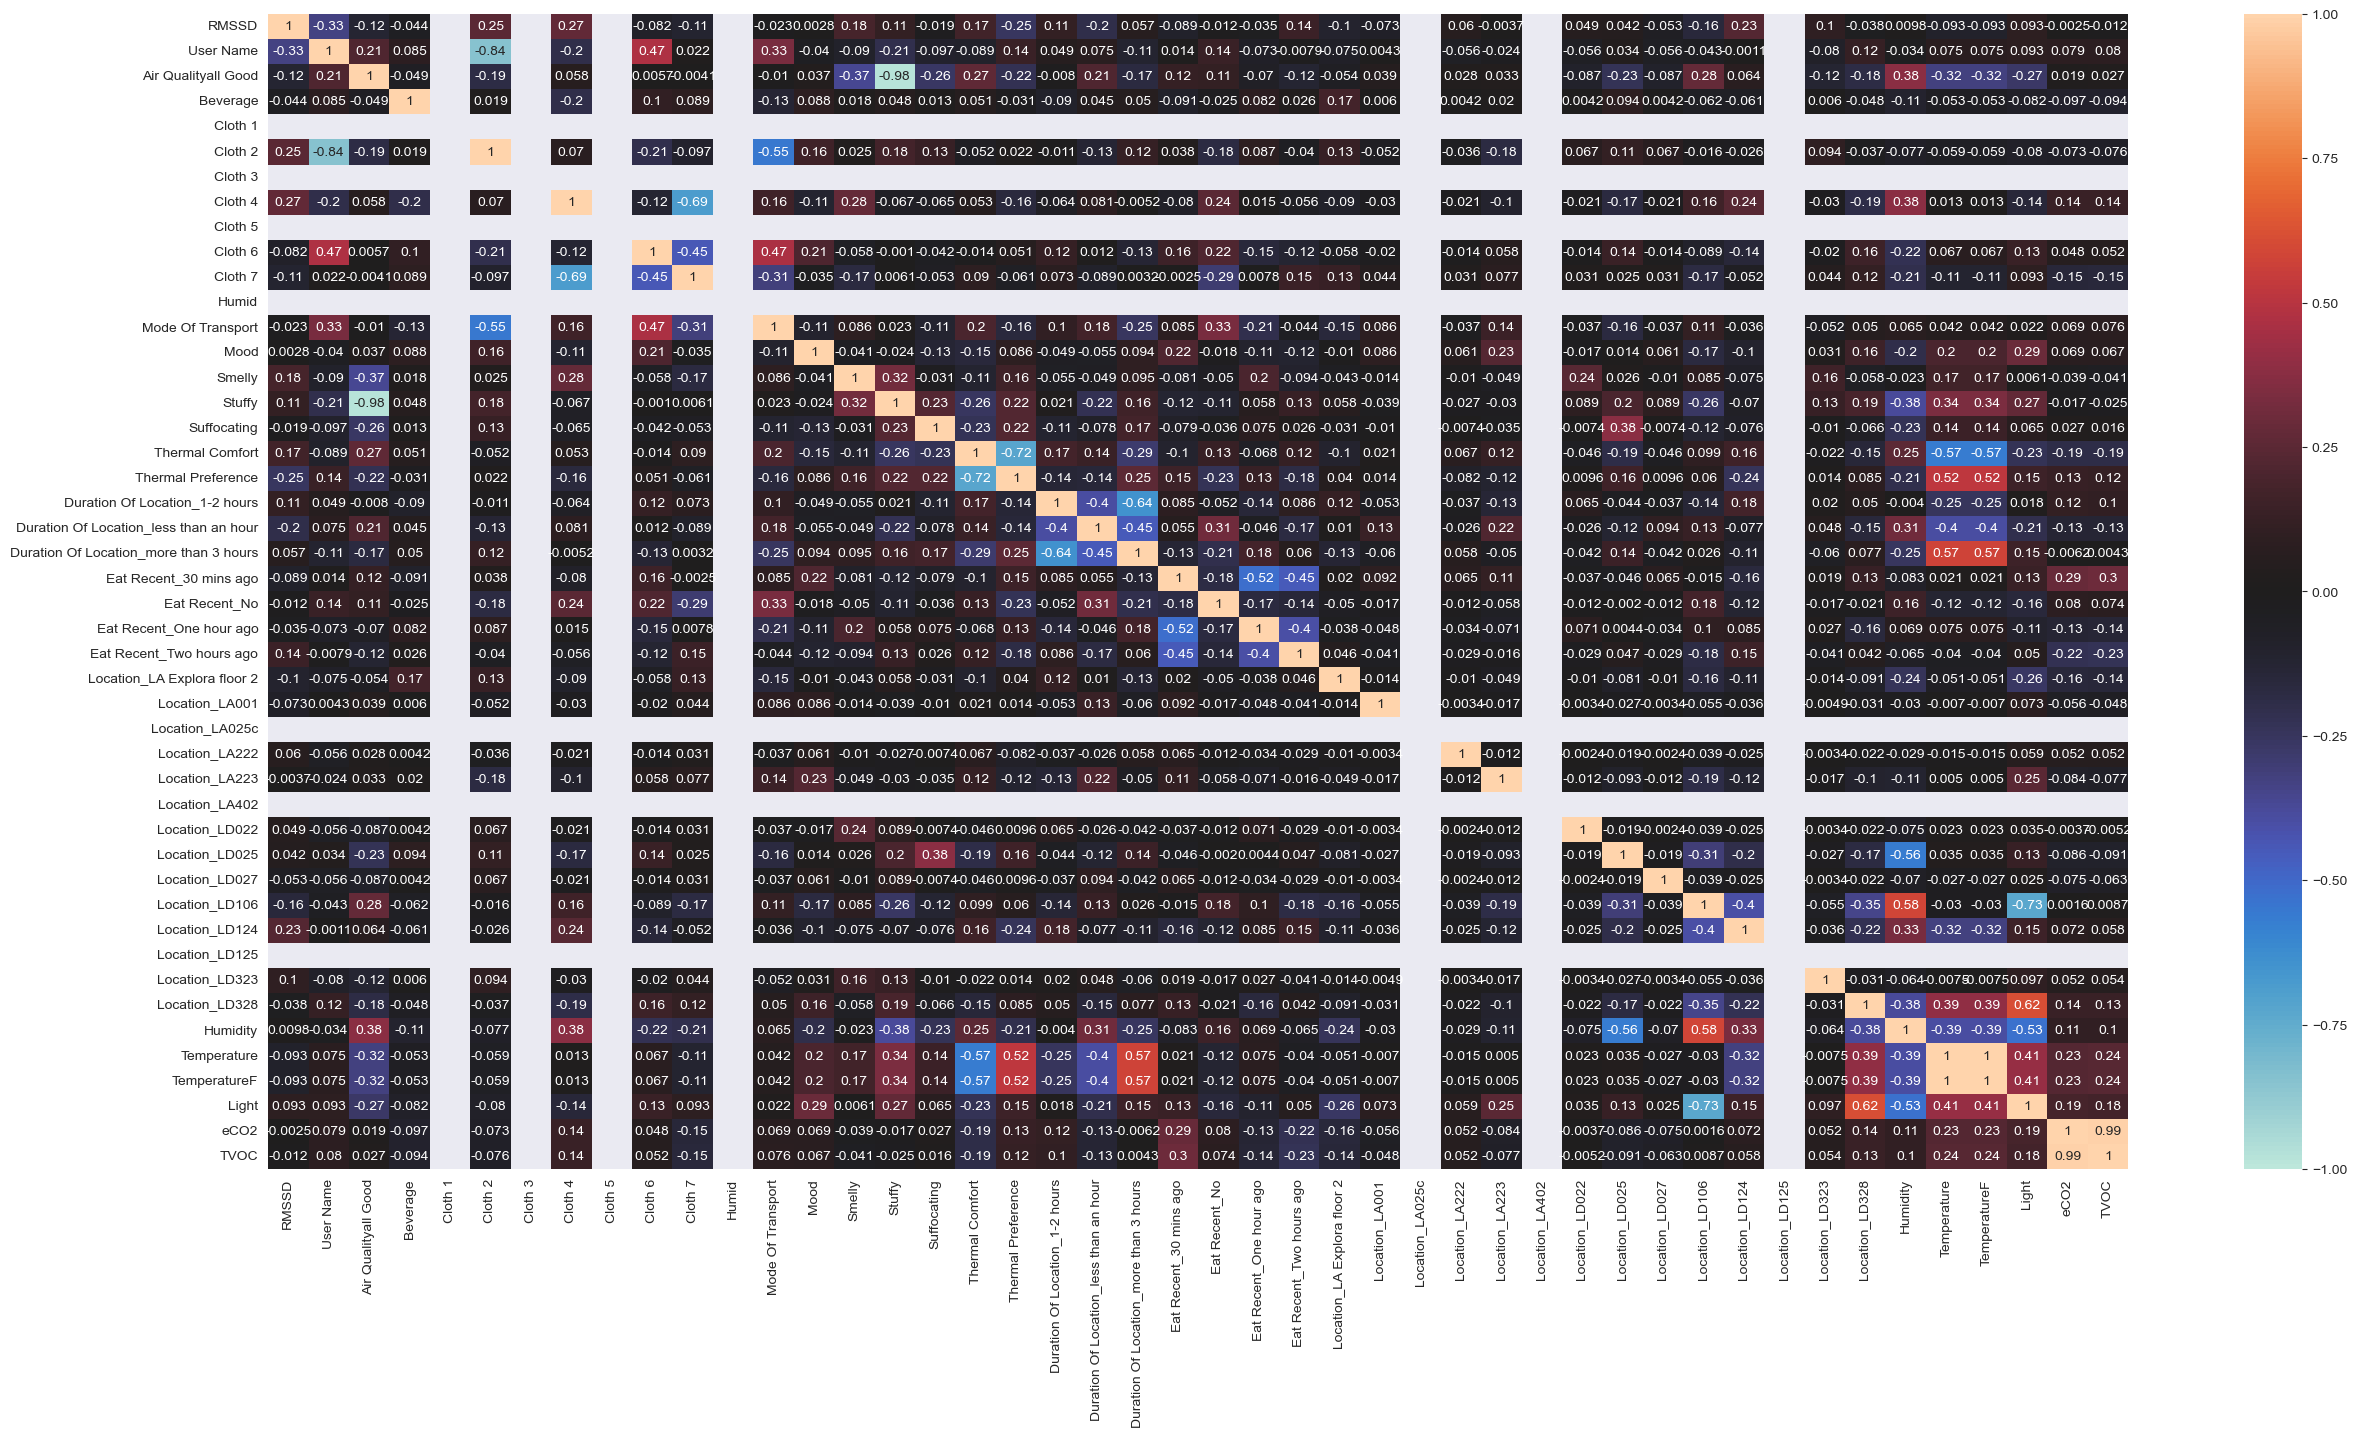

In [5]:
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(method="spearman"), annot=True, vmin=-1, vmax=1, center=0)

## Bivariate analysis vs thermal comfort

In [37]:
edtcdf = df[['Thermal Comfort','Temperature', 'Light', 'Humidity', 'eCO2', 'TVOC']]

<AxesSubplot:>

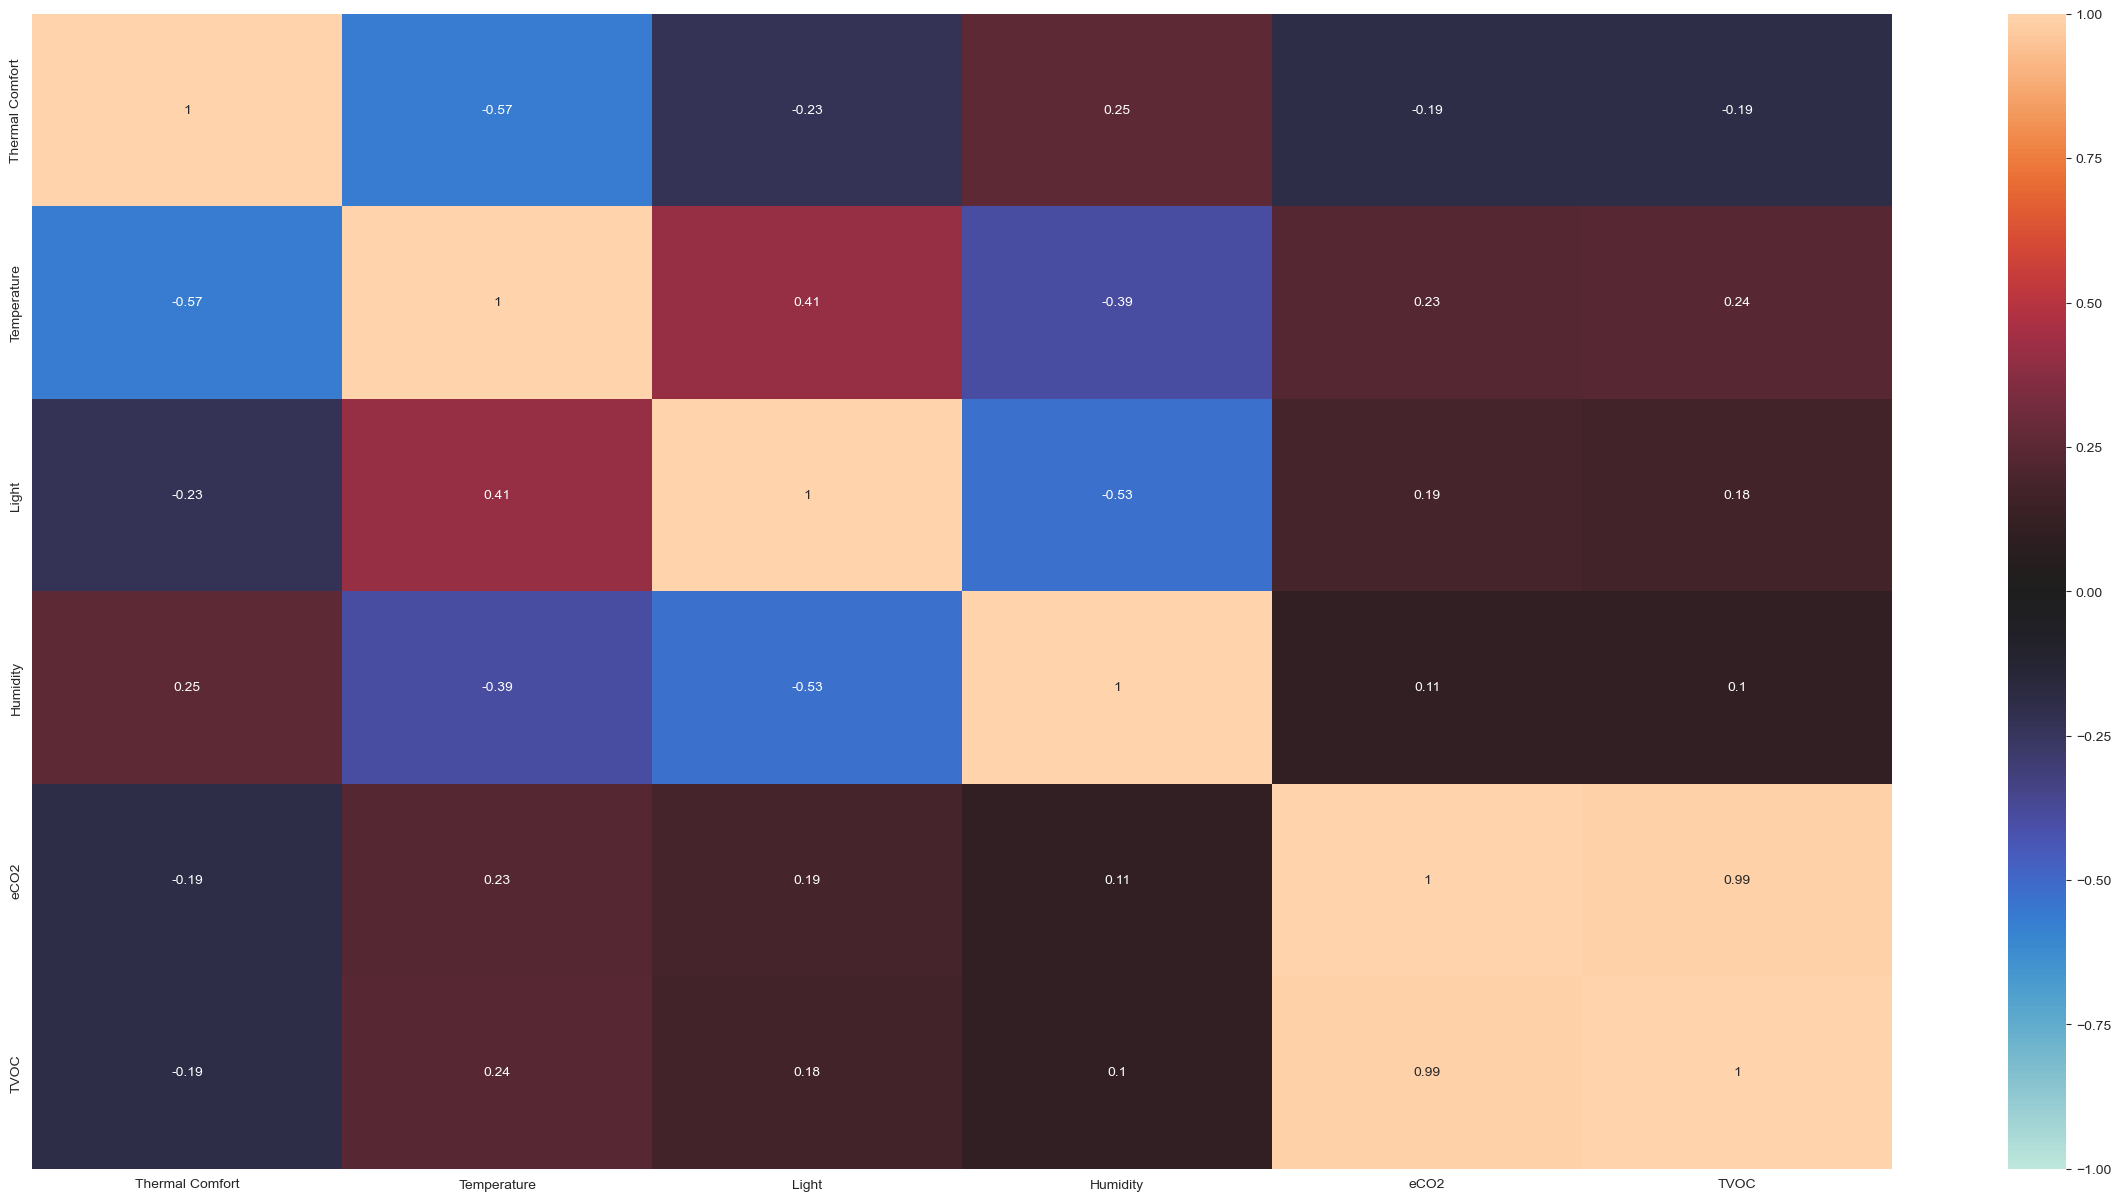

In [38]:
plt.figure(figsize=(30, 15))
sns.heatmap(edtcdf.corr(method="spearman"), annot=True, vmin=-1, vmax=1, center=0)

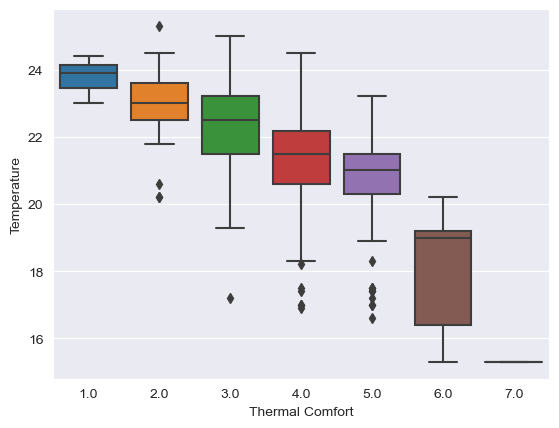

In [6]:
sns.boxplot(y="Temperature", x="Thermal Comfort", data=df);

So there is a strong correlation between thermal comfort and temperature, let's use Thermal comfort as our target and look at the correlations with other features.

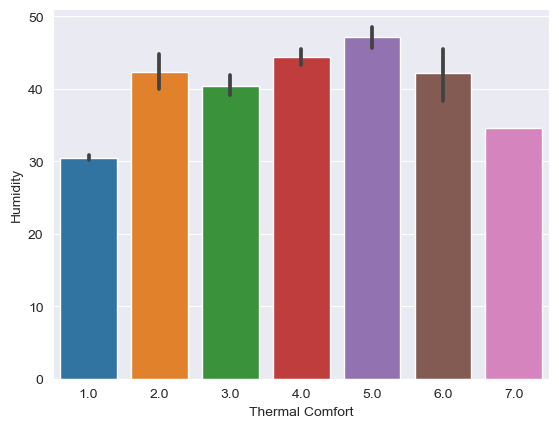

In [7]:
sns.barplot(y="Humidity", x="Thermal Comfort", data=df);

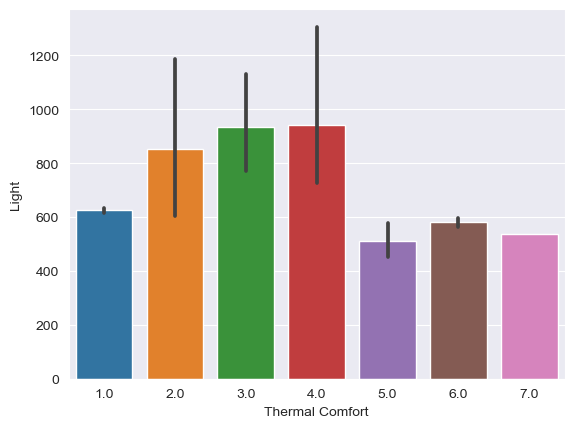

In [8]:
sns.barplot(y="Light", x="Thermal Comfort", data=df);

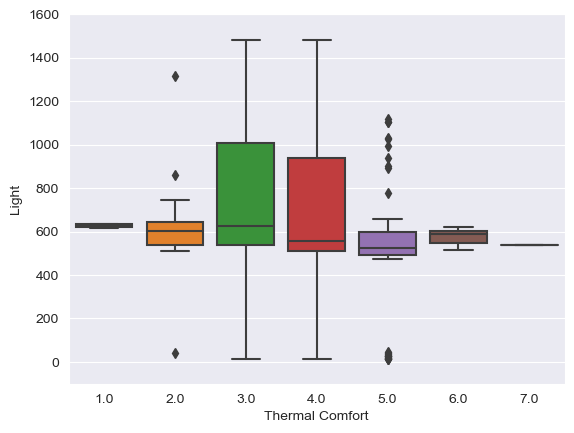

In [9]:
fig, ax = plt.subplots()
sns.boxplot(y="Light", x="Thermal Comfort", data=df, ax=ax);
ax.set_ylim(-100,1600)
plt.show()

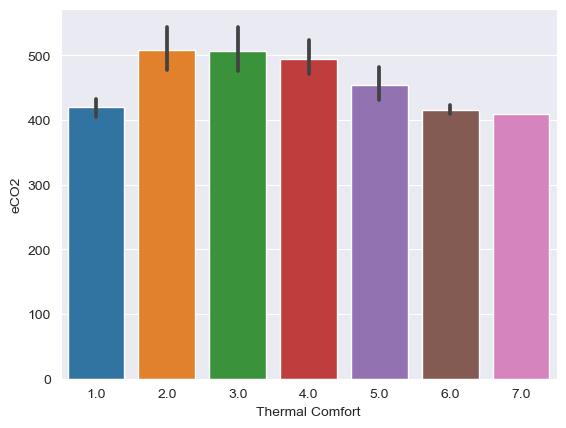

In [10]:
sns.barplot(y="eCO2", x="Thermal Comfort", data=df);

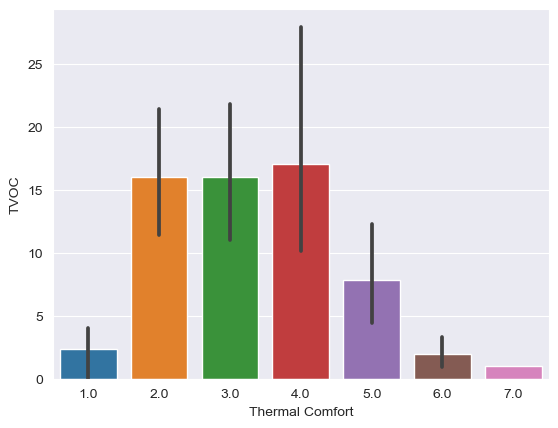

In [11]:
sns.barplot(y="TVOC", x="Thermal Comfort", data=df);

## Bivariate analysis vs HRV

In [12]:
data_job = df[df['User Name']=='Noah@email.com']
data_job
# sns.barplot(y="RMSSD", x="Thermal Comfort", data=df[['User Name' == "niek@email.com"]]);

,DateTime,RMSSD,User Name,Air Qualityall Good,Beverage,Cloth 1,Cloth 2,Cloth 3,Cloth 4,Cloth 5,...,Location_LD124,Location_LD125,Location_LD323,Location_LD328,Humidity,Temperature,TemperatureF,Light,eCO2,TVOC


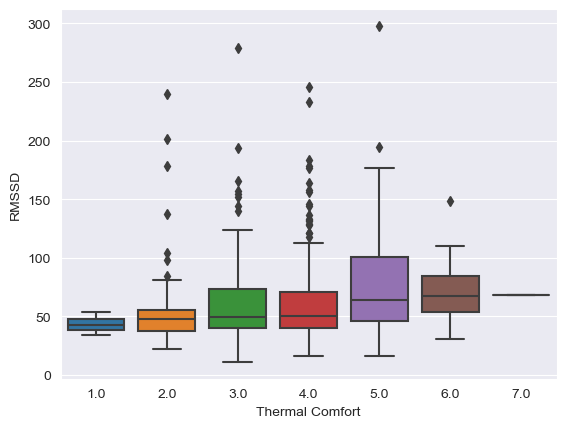

In [13]:
sns.boxplot(y="RMSSD", x="Thermal Comfort", data=df);

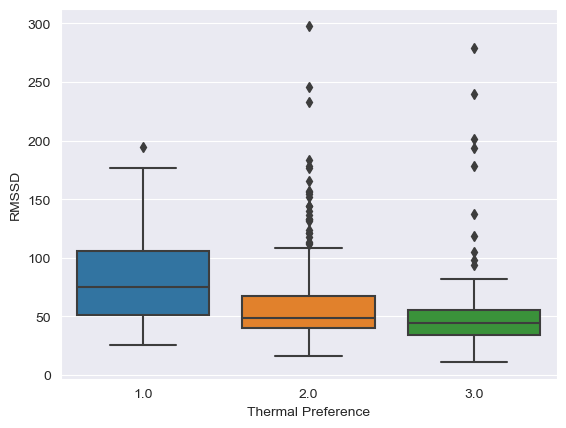

In [39]:
sns.boxplot(y="RMSSD", x="Thermal Preference", data=df);

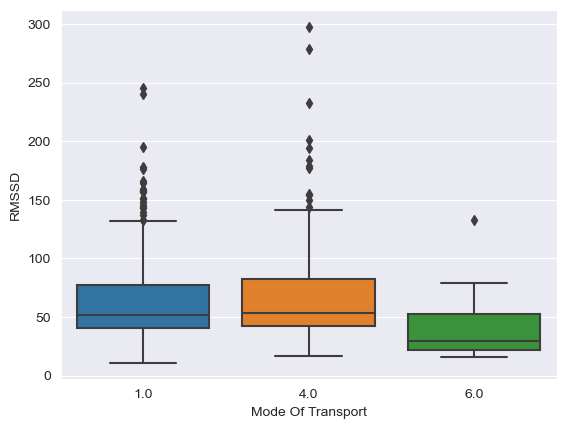

In [41]:
sns.boxplot(y="RMSSD", x="Mode Of Transport", data=df);

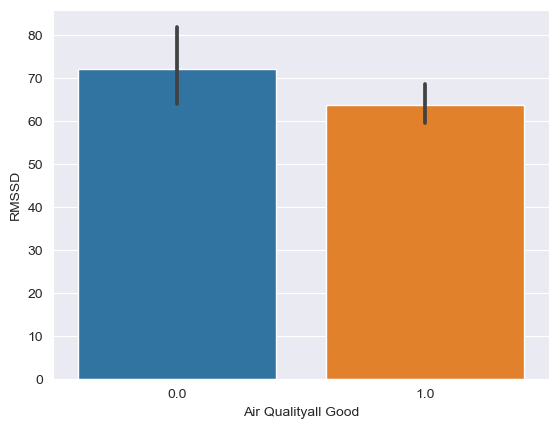

In [14]:
sns.barplot(y="RMSSD", x="Air Qualityall Good", data=df);

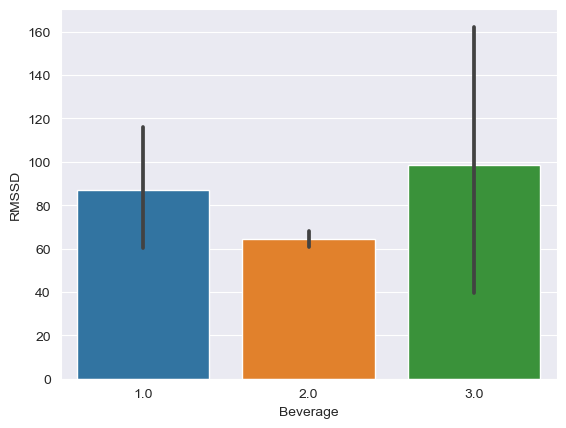

In [15]:
sns.barplot(y="RMSSD", x="Beverage", data=df);

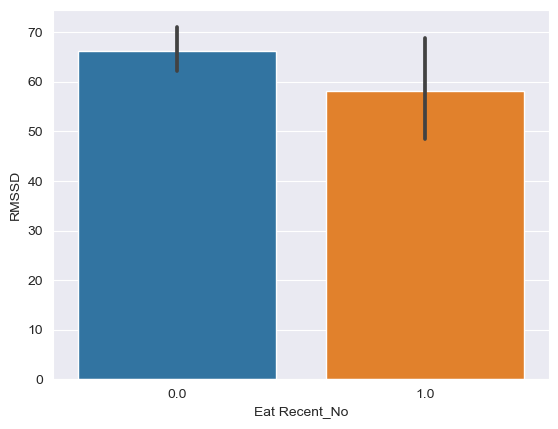

In [16]:
sns.barplot(y="RMSSD", x="Eat Recent_No", data=df);

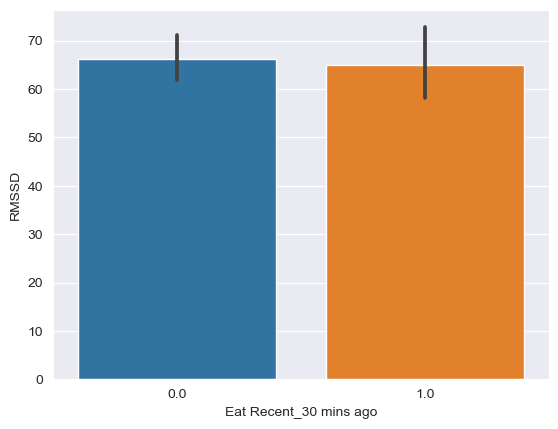

In [17]:
sns.barplot(y="RMSSD", x="Eat Recent_30 mins ago", data=df);

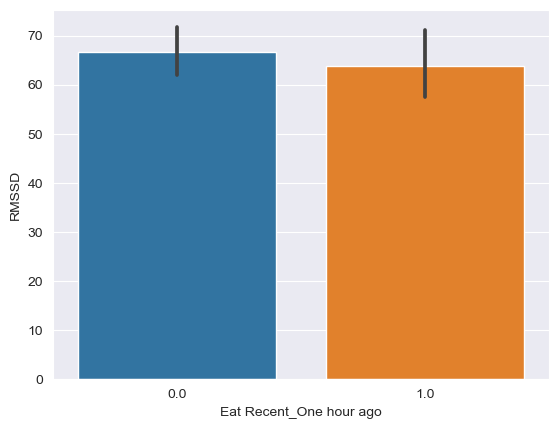

In [18]:
sns.barplot(y="RMSSD", x="Eat Recent_One hour ago", data=df);

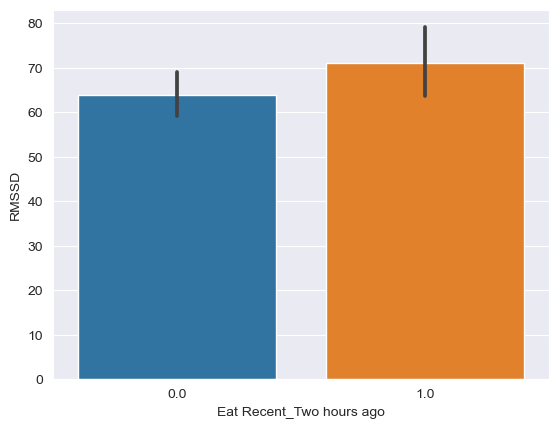

In [19]:
sns.barplot(y="RMSSD", x="Eat Recent_Two hours ago", data=df);

In [20]:
afdf = df[['RMSSD','Air Qualityall Good', 'Beverage', 'Mode Of Transport','Mood','Stuffy', 'Suffocating', 'Smelly', 'Thermal Preference','Thermal Comfort','Cloth 2','Cloth 4','Cloth 6','Cloth 7']]

<AxesSubplot:>

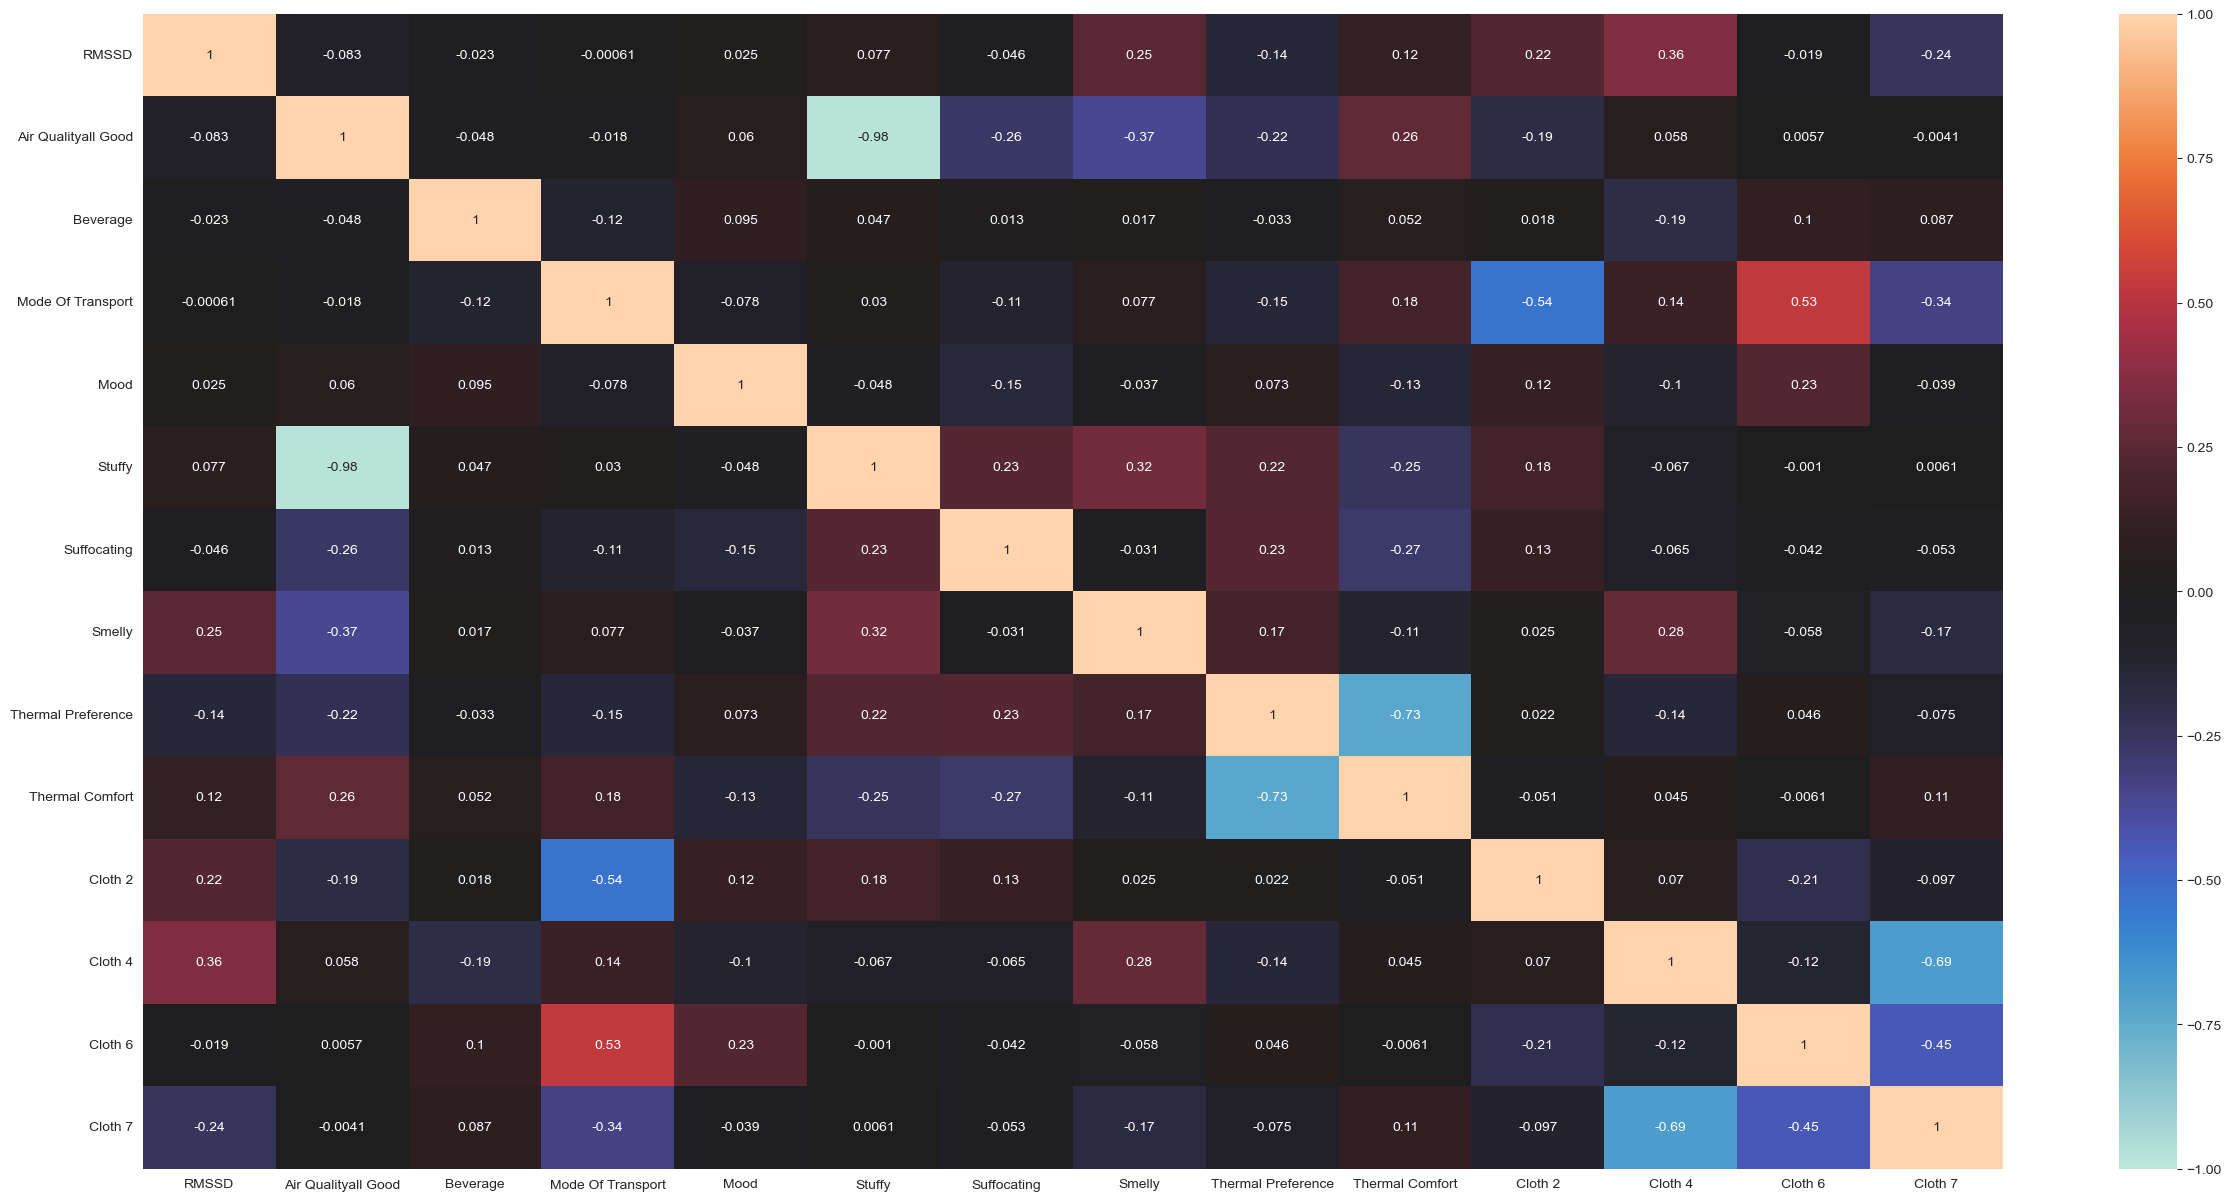

In [21]:
plt.figure(figsize=(30, 15))
sns.heatmap(afdf.corr(method="pearson"), annot=True, vmin=-1, vmax=1, center=0)

<AxesSubplot:>

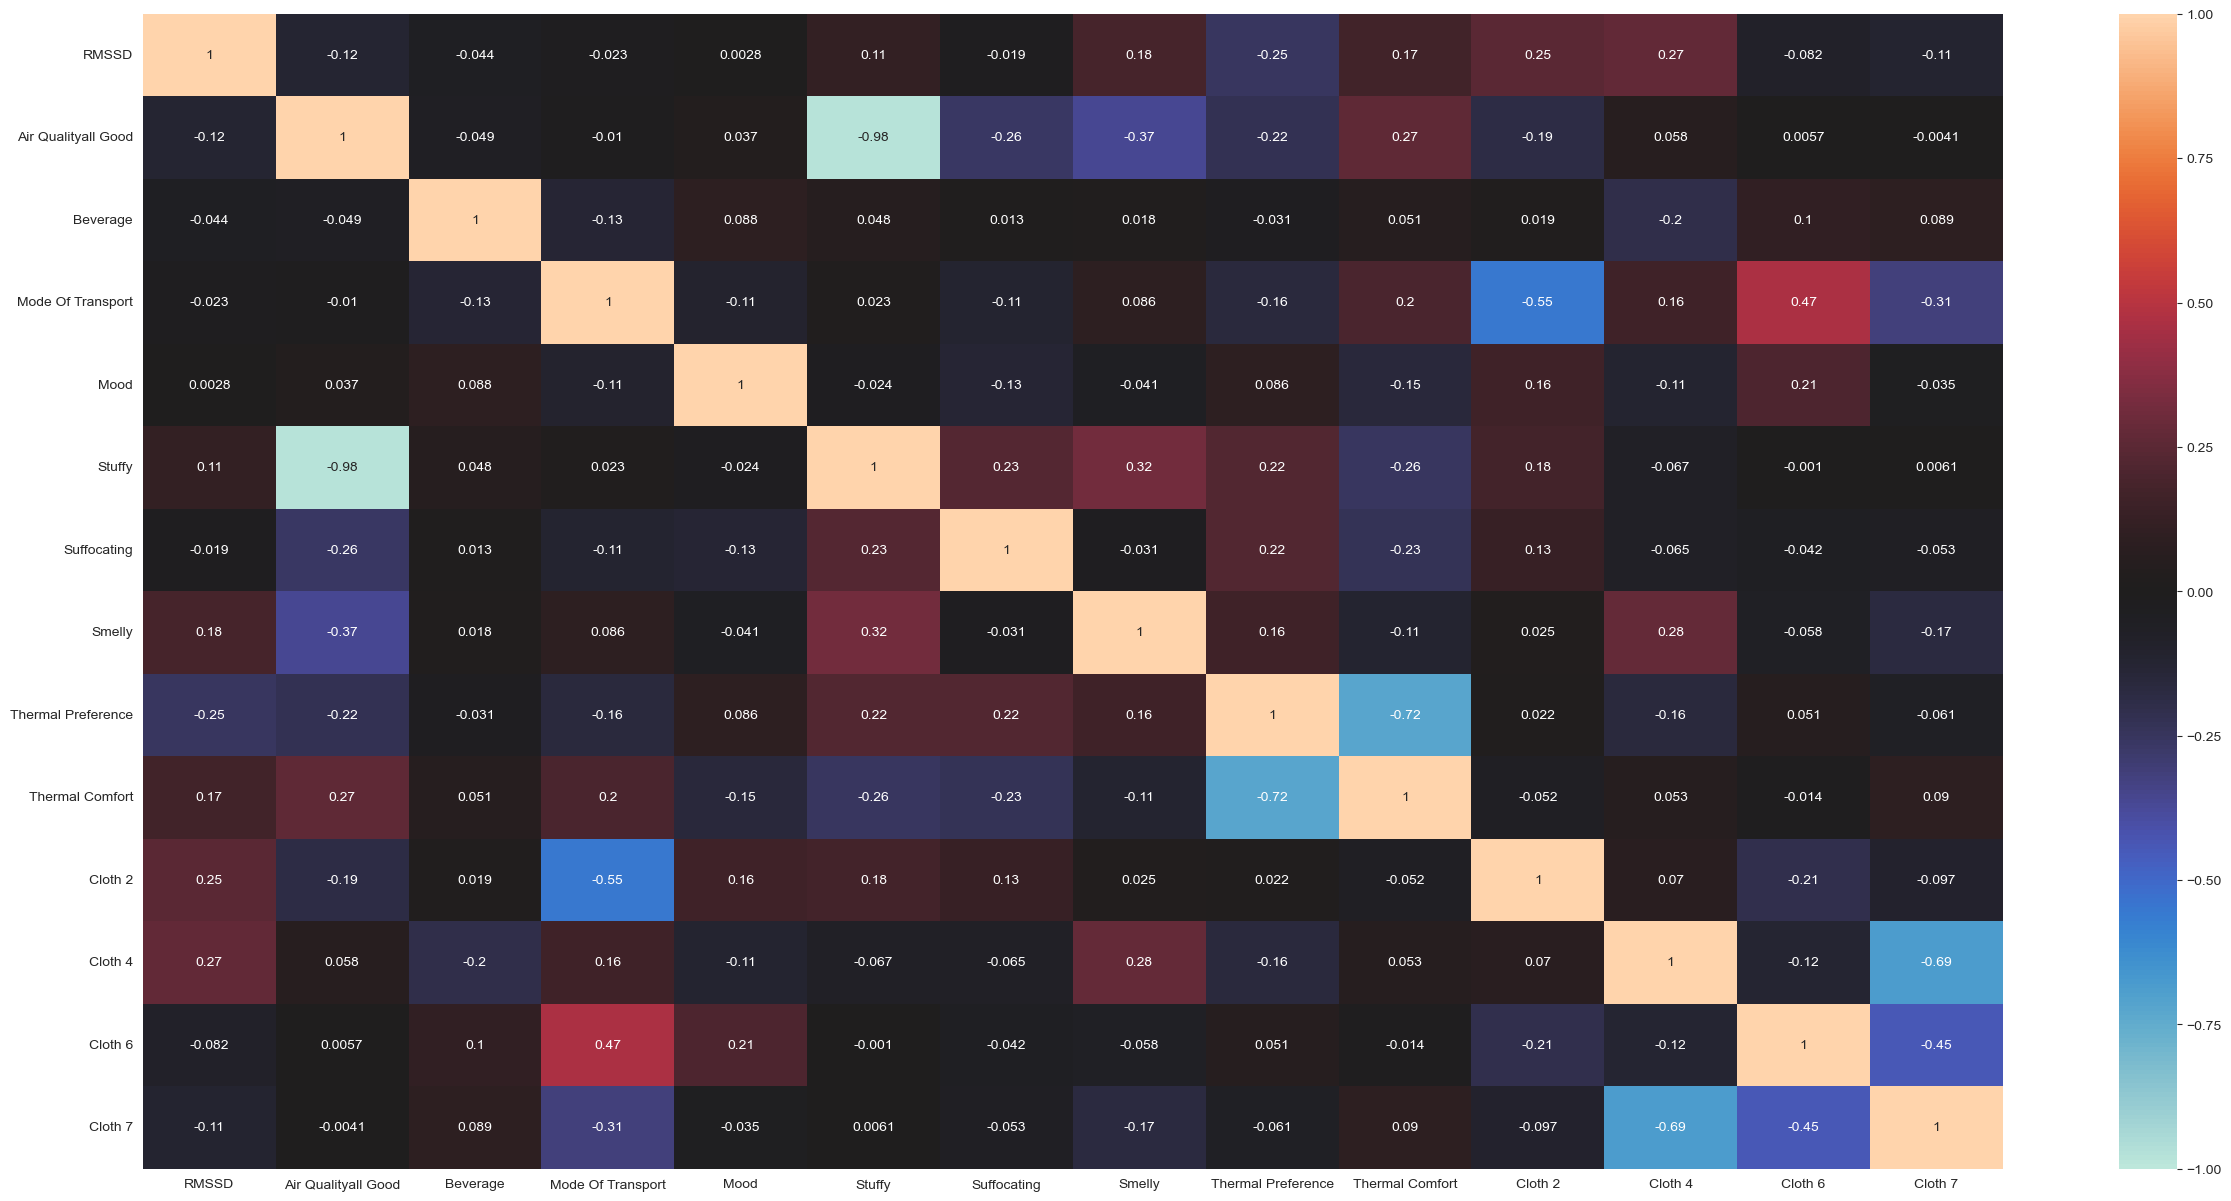

In [22]:
plt.figure(figsize=(30, 15))
sns.heatmap(afdf.corr(method="spearman"), annot=True, vmin=-1, vmax=1, center=0)

## Environmental data vs HRV

<AxesSubplot:xlabel='Temperature', ylabel='RMSSD'>

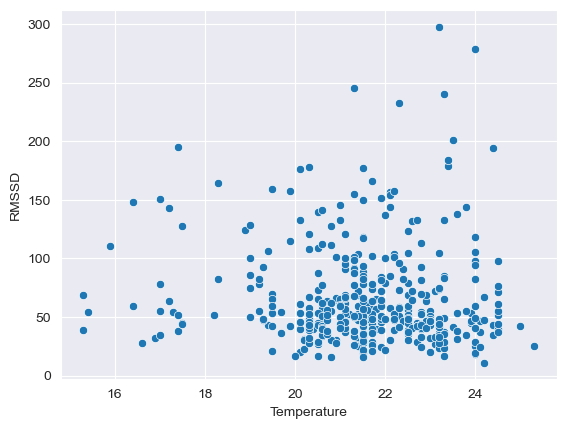

In [23]:
sns.scatterplot(data=df, x="Temperature", y="RMSSD")

<AxesSubplot:xlabel='Temperature', ylabel='RMSSD'>

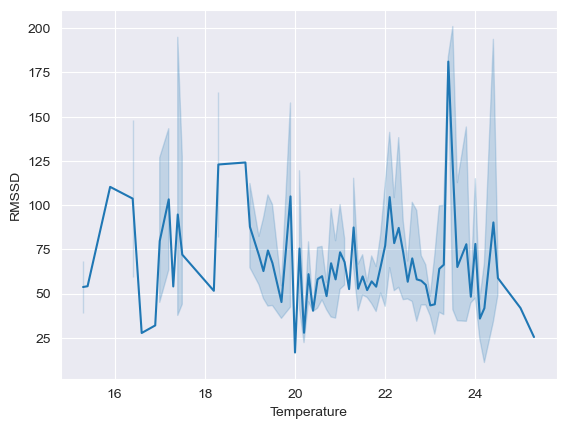

In [24]:
sns.lineplot(data=df, x="Temperature", y="RMSSD")

<AxesSubplot:xlabel='Temperature', ylabel='RMSSD'>

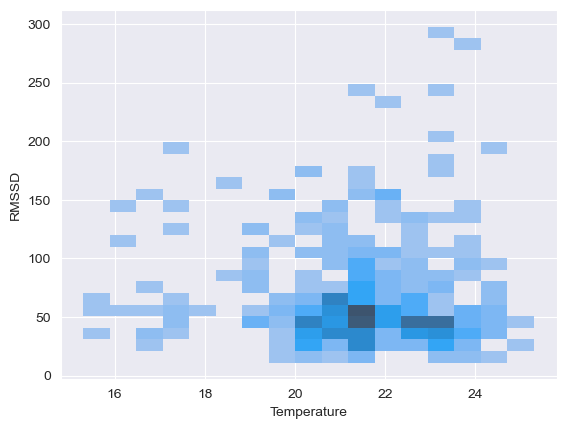

In [25]:
sns.histplot(data=df, x="Temperature", y="RMSSD")

### Light

<AxesSubplot:xlabel='Light', ylabel='RMSSD'>

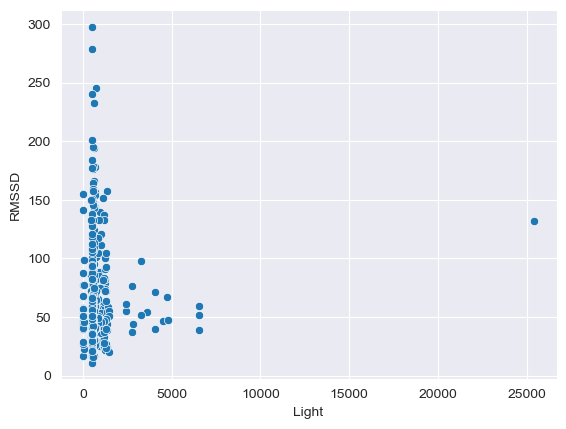

In [26]:
sns.scatterplot(data=df, x="Light", y="RMSSD")

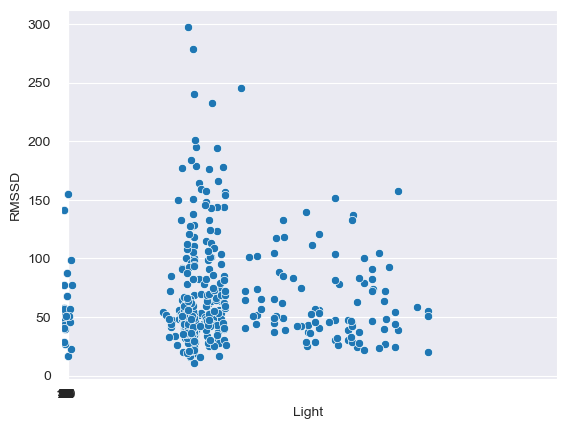

In [27]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="Light", y="RMSSD", ax= ax)
ax.set_xlim(0,2000)
ax.set_xticks(range(1,32))
plt.show()

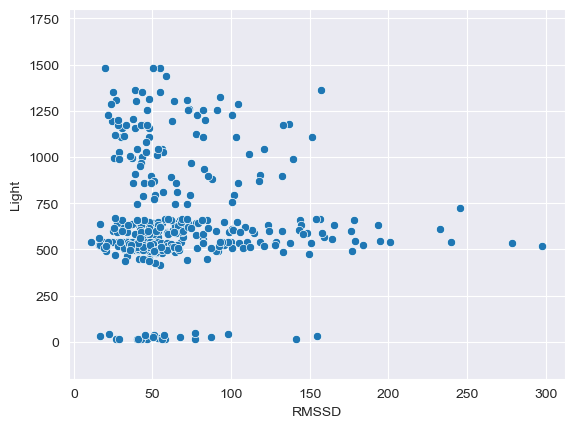

In [28]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, y="Light", x="RMSSD", ax= ax)
ax.set_ylim(-200,1800)
plt.show()

In [30]:
eddf = df[['RMSSD','Temperature', 'Light', 'Humidity', 'eCO2', 'TVOC']]

<AxesSubplot:>

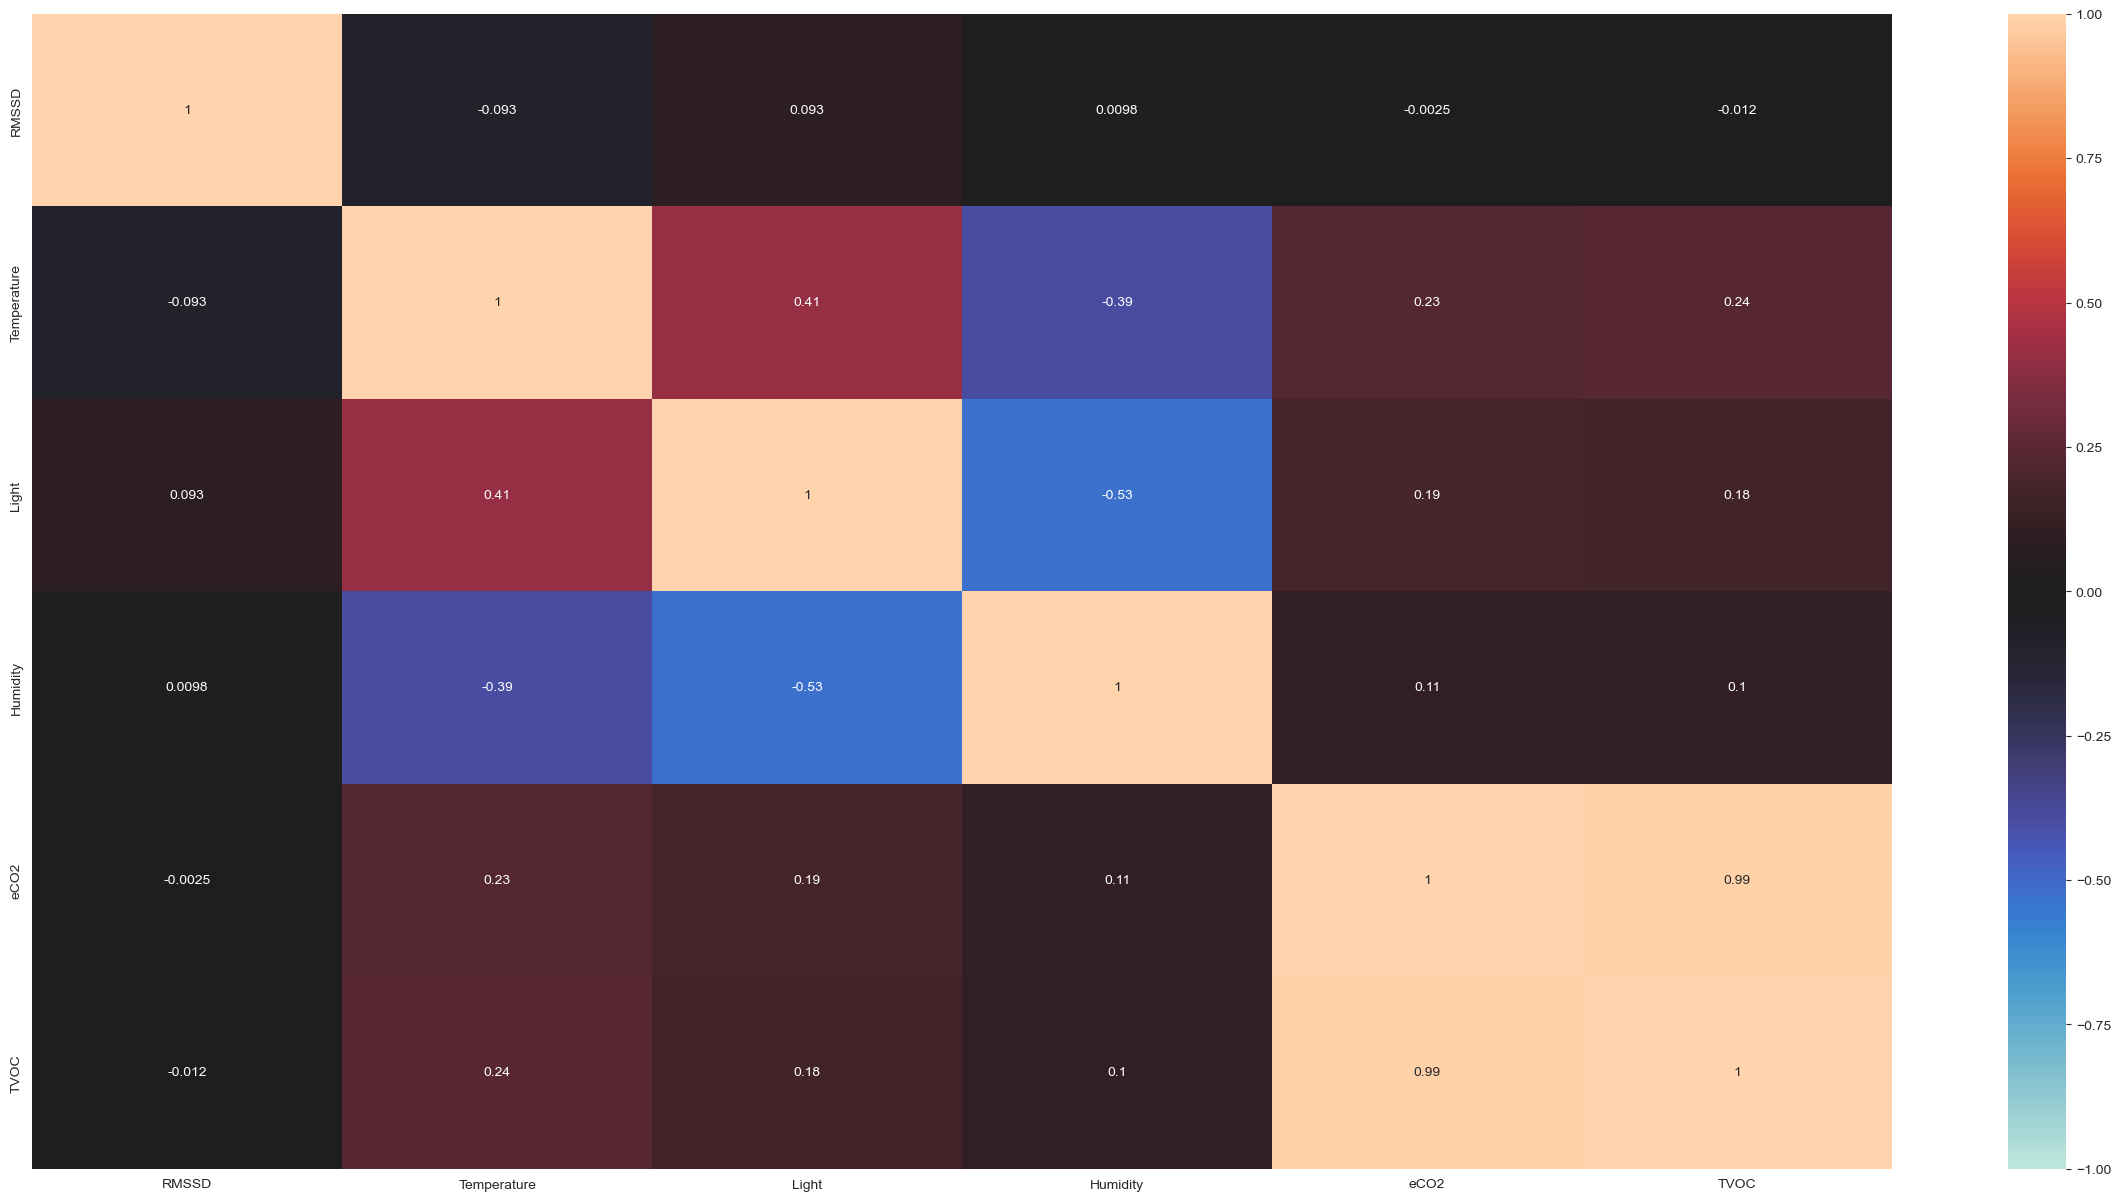

In [33]:
plt.figure(figsize=(30, 15))
sns.heatmap(eddf.corr(method="spearman"), annot=True, vmin=-1, vmax=1, center=0)